In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_excel("employe data final.xlsx")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [4]:
data.shape

(2499, 13)

In [5]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,2499.000000,2499.000000,2499.000000,2312.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,38555.492197,1.248900,34.941176,3.350346,5.927171,0.354542,0.025210,63.512205
std,22405.731746,0.571257,7.723410,1.247450,4.188643,0.478470,0.156794,13.448749
min,19.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,43.000000
25%,19082.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38585.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,57882.000000,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,76.000000
max,78280.000000,7.000000,60.000000,5.000000,31.000000,1.000000,1.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           2499 non-null   int64  
 1   department            2499 non-null   object 
 2   region                2499 non-null   object 
 3   education             2383 non-null   object 
 4   gender                2499 non-null   object 
 5   recruitment_channel   2499 non-null   object 
 6   no_of_trainings       2499 non-null   int64  
 7   age                   2499 non-null   int64  
 8   previous_year_rating  2312 non-null   float64
 9   length_of_service     2499 non-null   int64  
 10  KPIs_met >80%         2499 non-null   int64  
 11  awards_won?           2499 non-null   int64  
 12  avg_training_score    2499 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 253.9+ KB


In [7]:
data.isnull().sum()

employee_id               0
department                0
region                    0
education               116
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    187
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
dtype: int64

<AxesSubplot:>

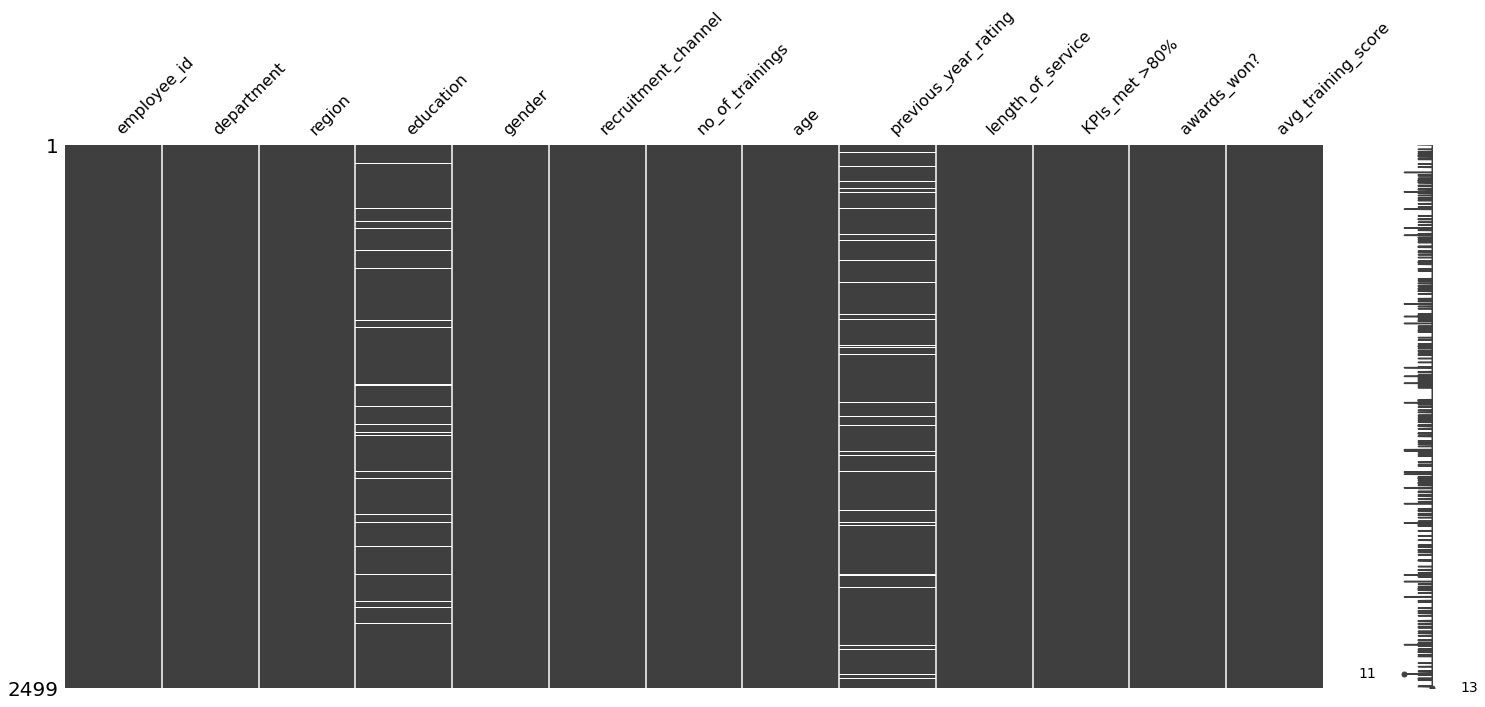

In [8]:
import missingno as msno
msno.matrix(data)

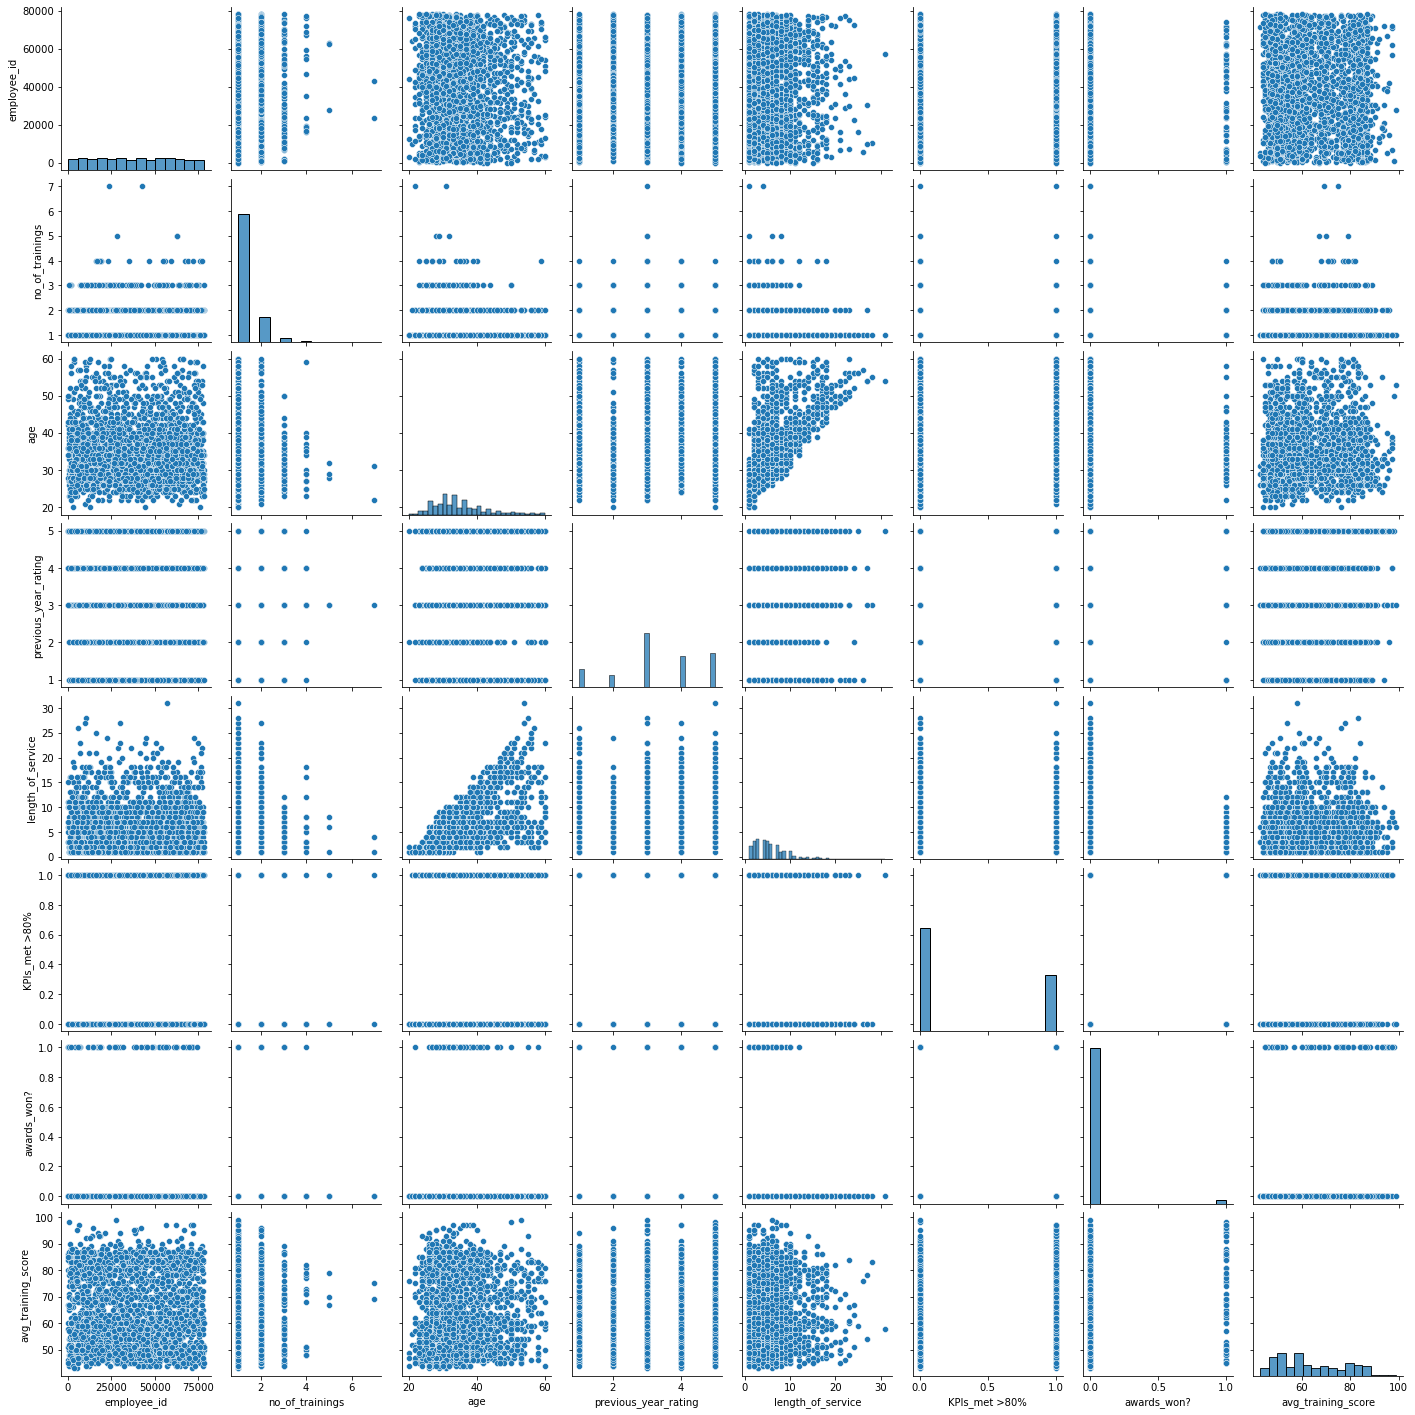

In [9]:
#Exploratory Data Analysis 
### Pairplot using seaborn library
sns.pairplot(data)

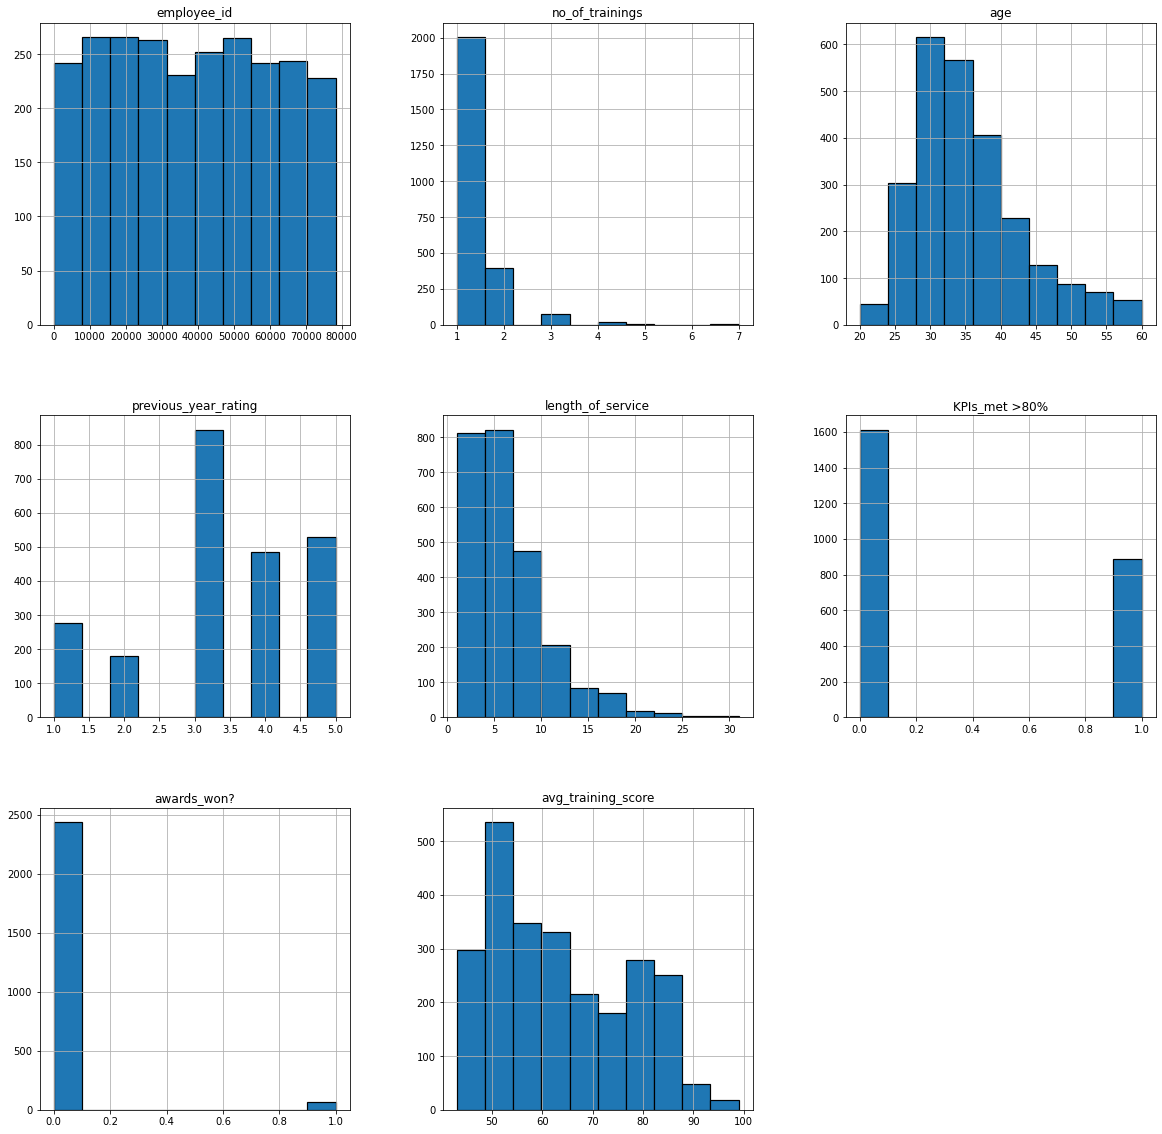

In [10]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<AxesSubplot:>

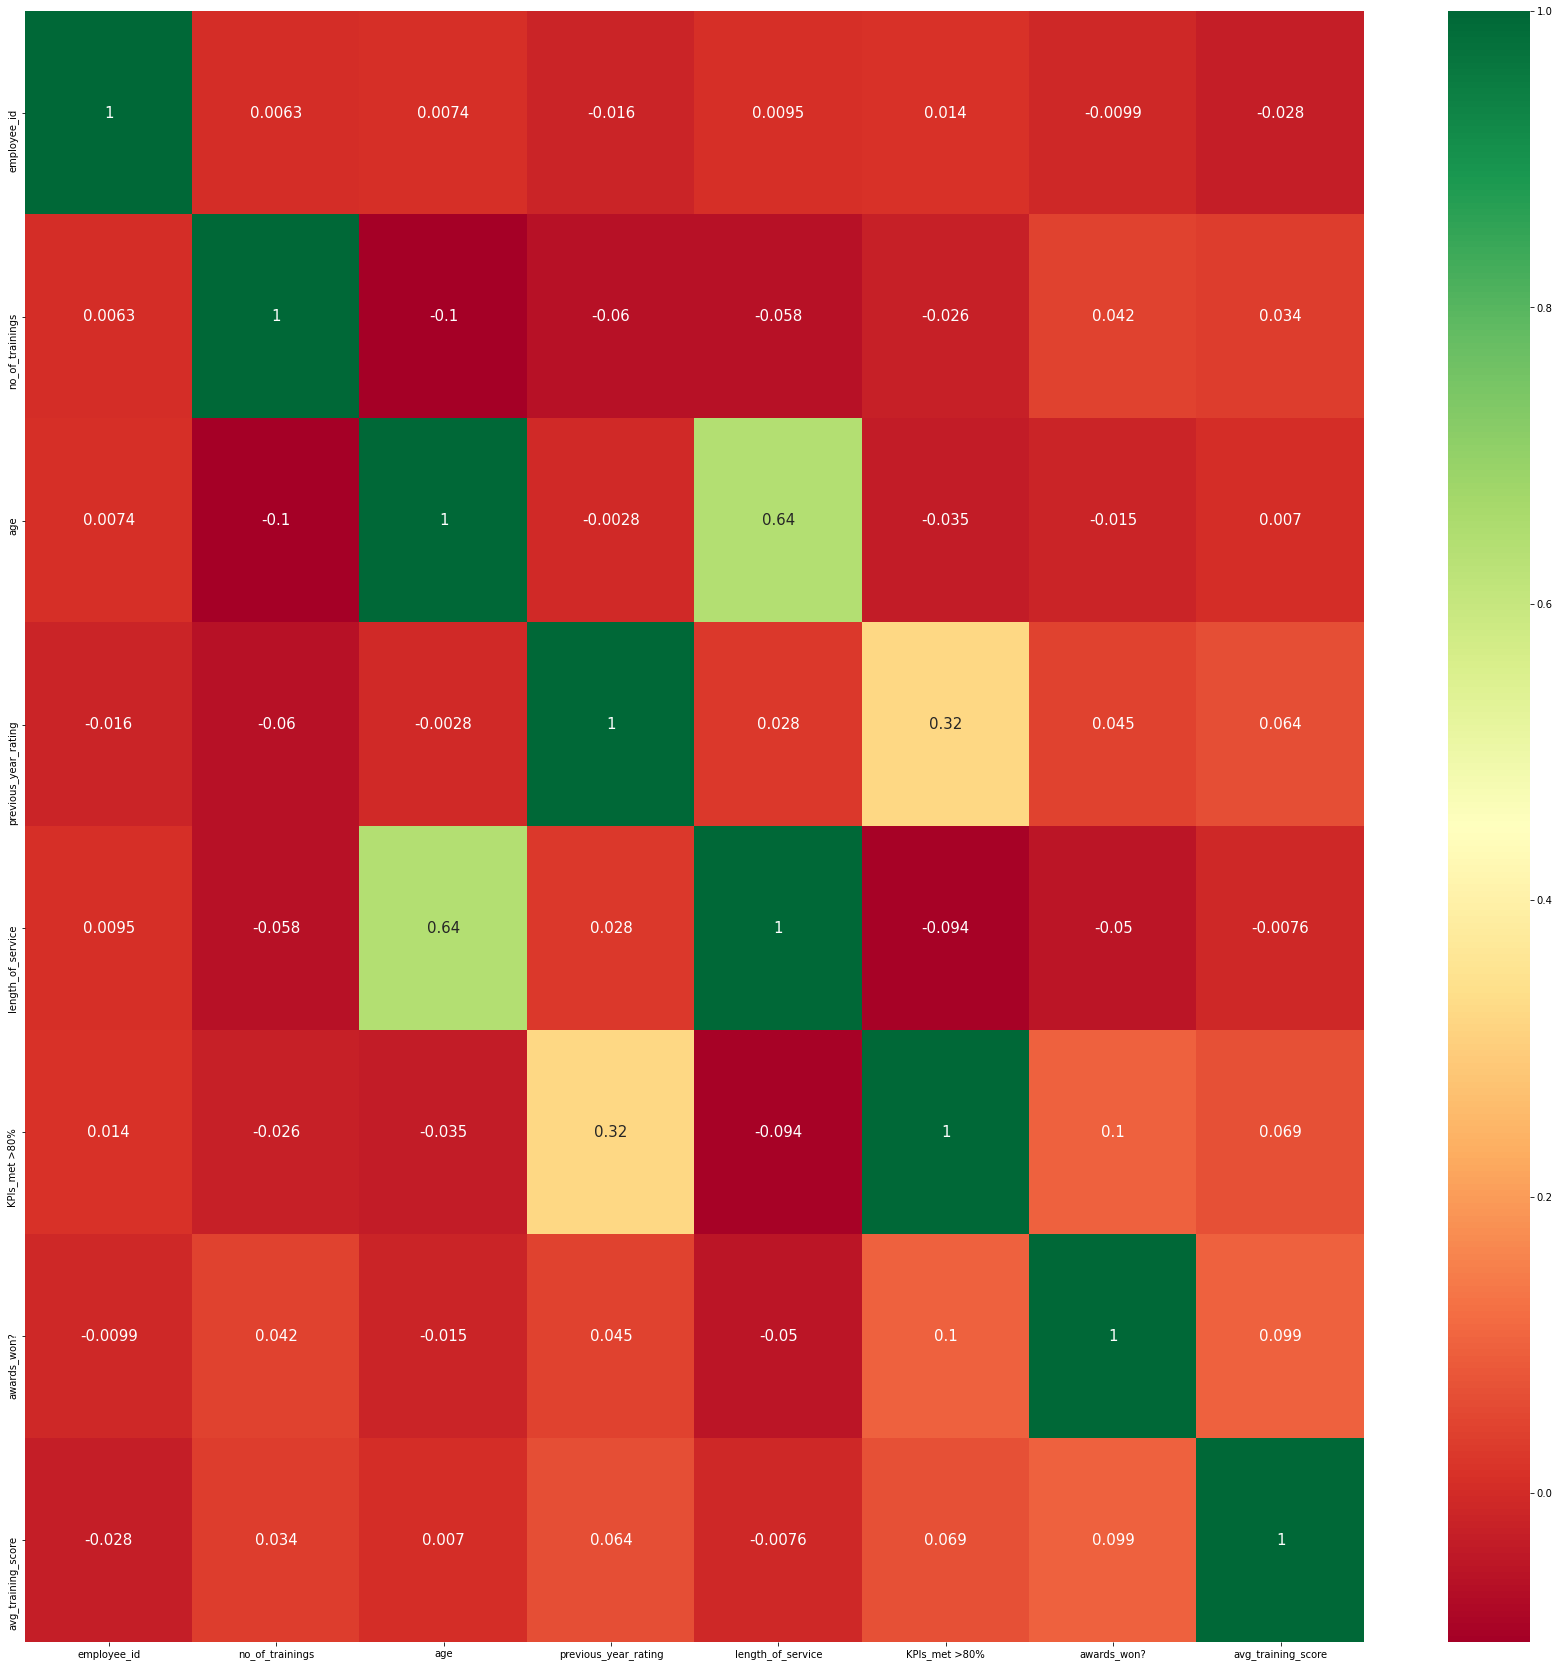

In [11]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [12]:
data['department'].value_counts()

Sales & Marketing    743
Operations           507
Procurement          331
Technology           326
Analytics            250
Finance              123
HR                   119
Legal                 51
R&D                   49
Name: department, dtype: int64

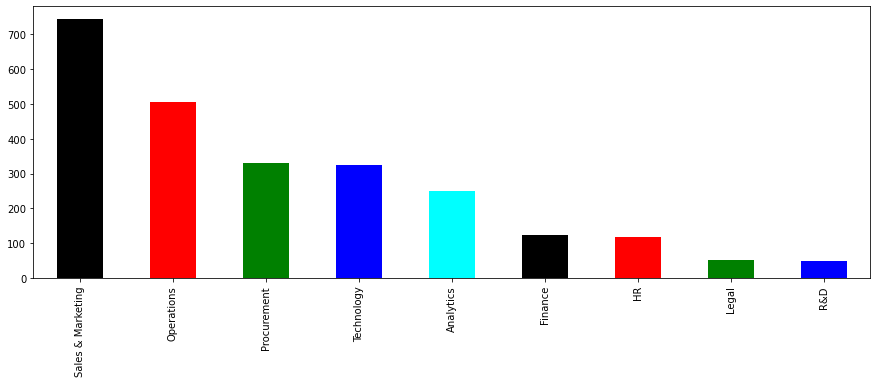

In [13]:
# visualizing the different groups in the dataset
plt.subplots(figsize=(15,5))
data['department'].value_counts(normalize = True)
data['department'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


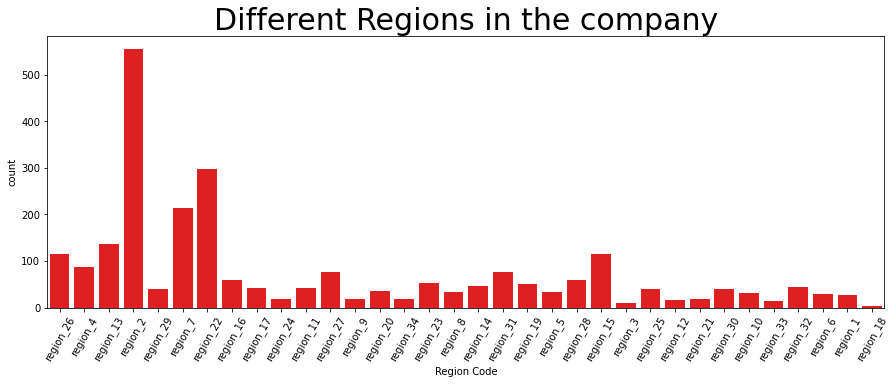

In [14]:
# checking the different regions of the company
plt.subplots(figsize=(15,5))
sns.countplot(data['region'], color = 'red')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code')
plt.ylabel('count')
plt.show()

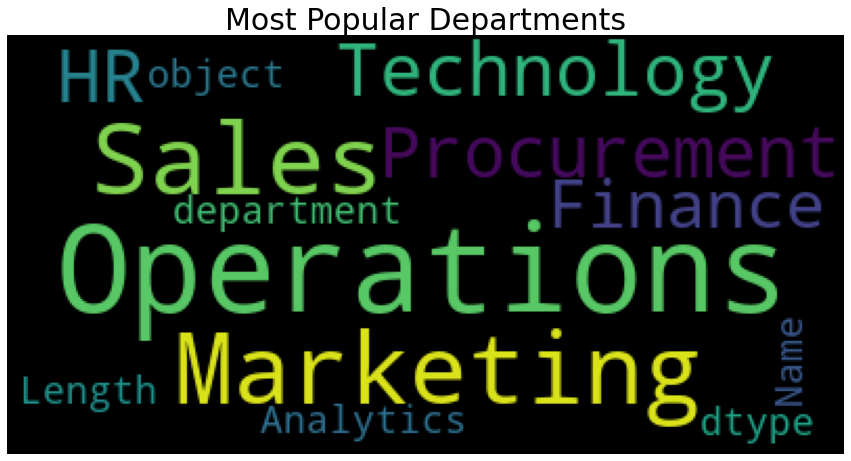

In [15]:
 #### Check most popular department
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopword).generate(str(data['department']))

plt.rcParams['figure.figsize'] = (15, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

In [16]:
data['education'].value_counts()

Bachelor's          1621
Master's & above     723
Below Secondary       39
Name: education, dtype: int64

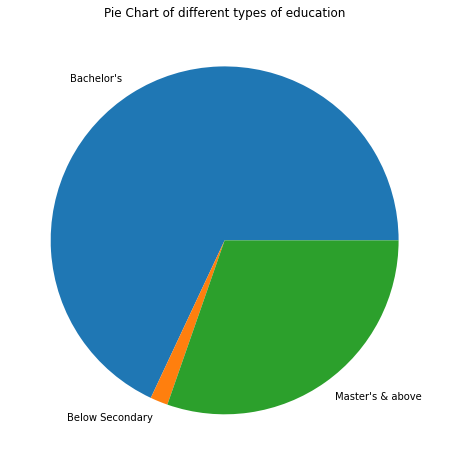

In [17]:
# Prepare Data
df = data.groupby('education').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of different types of education")
plt.ylabel("")
plt.show()

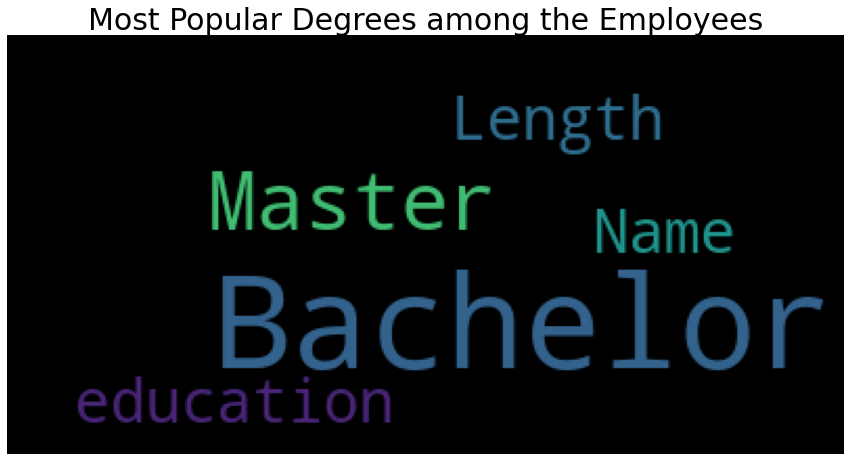

In [18]:
# most popular education degree among the employees

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopword, max_words = 5).generate(str(data['education']))

plt.rcParams['figure.figsize'] = (15, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Degrees among the Employees', fontsize = 30)
plt.axis('off')
plt.show()

In [19]:
data['gender'].value_counts()

m    1778
f     721
Name: gender, dtype: int64

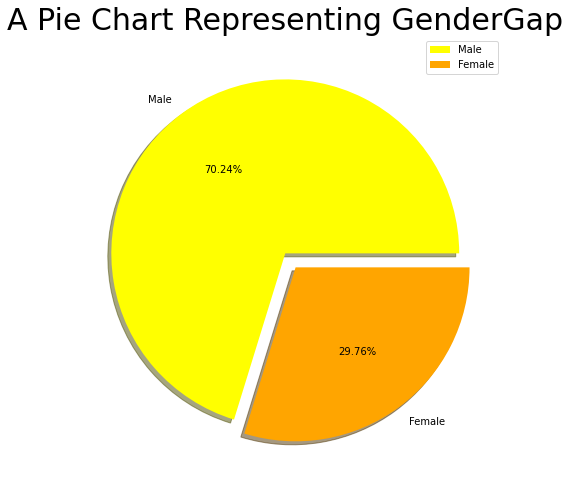

In [20]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

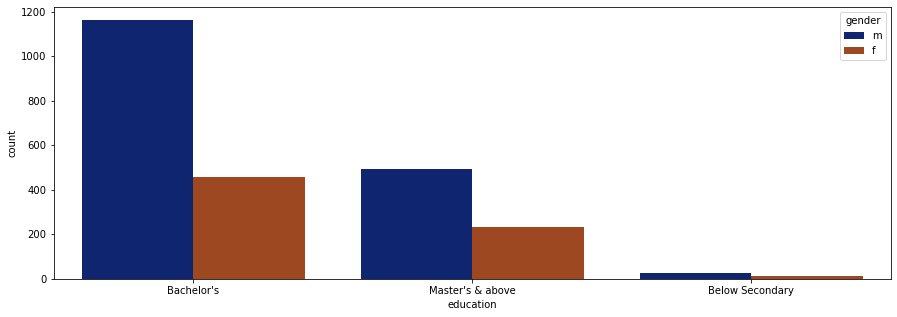

In [22]:
 #comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'education', data = data, hue = 'gender', palette = 'dark')
plt.show()

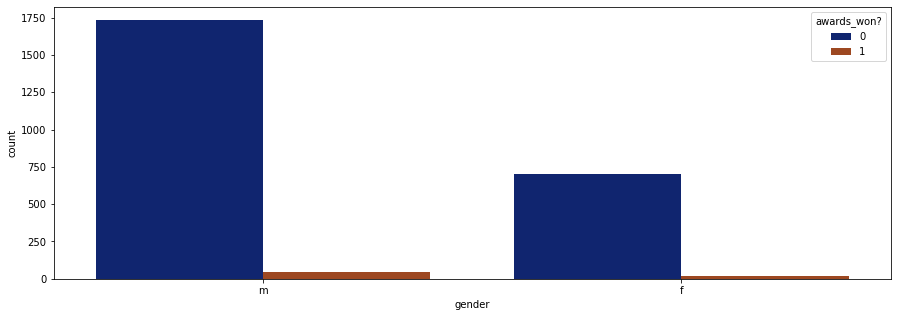

In [52]:
# comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'gender', data = data, hue = 'awards_won?', palette = 'dark')
plt.show()

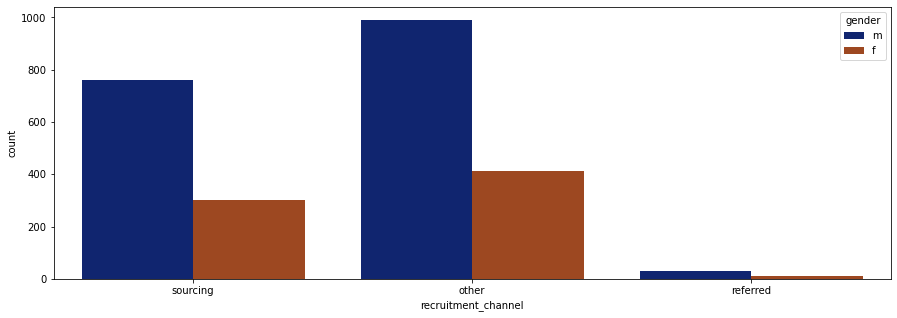

In [24]:
# comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'recruitment_channel', data = data, hue = 'gender', palette = 'dark')
plt.show()

In [25]:
data['recruitment_channel'].value_counts()

other       1401
sourcing    1059
referred      39
Name: recruitment_channel, dtype: int64

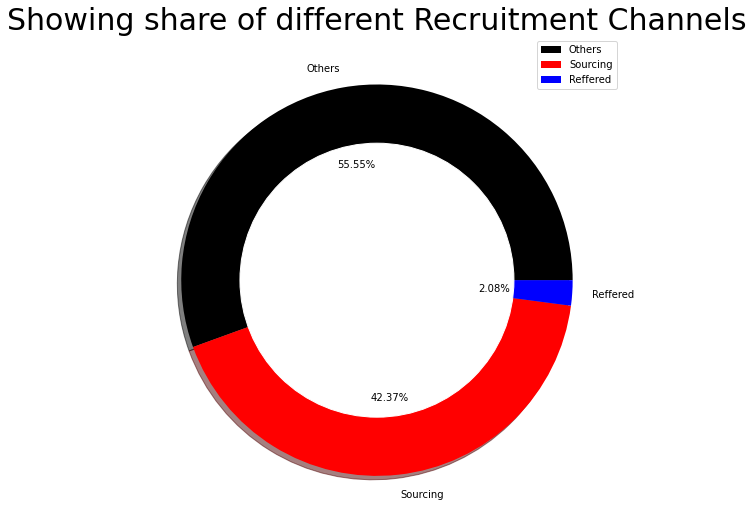

In [26]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['black', 'red', 'blue']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age of Employees')

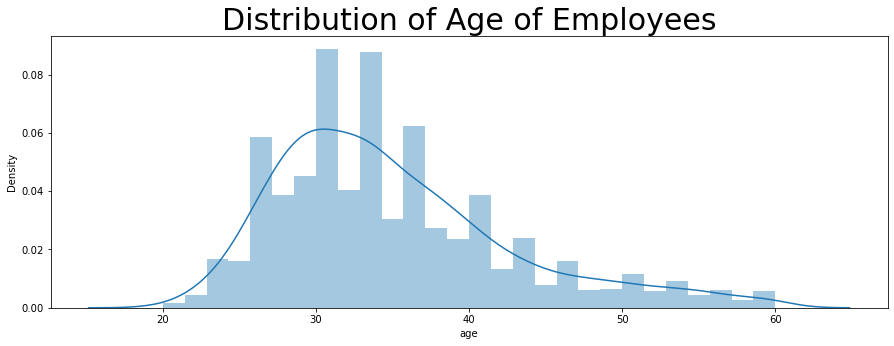

In [27]:
plt.subplots(figsize=(15,5))
sns.distplot(data['age'])
plt.title('Distribution of Age of Employees', fontsize = 30)

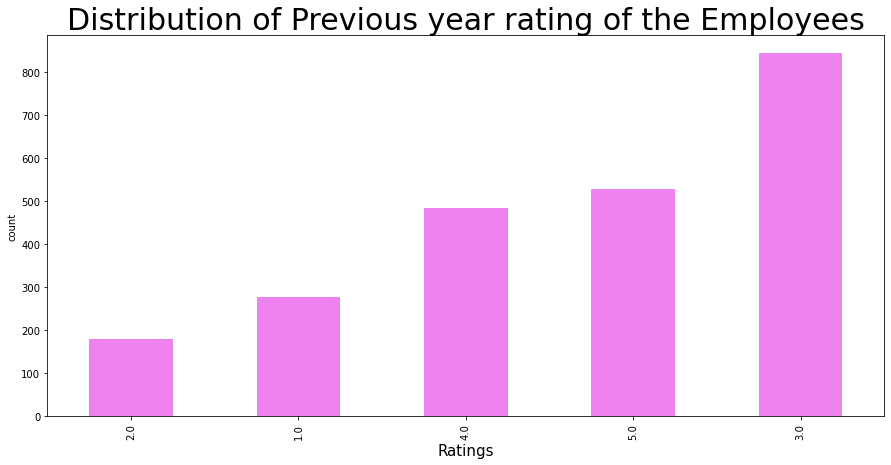

In [28]:
data['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


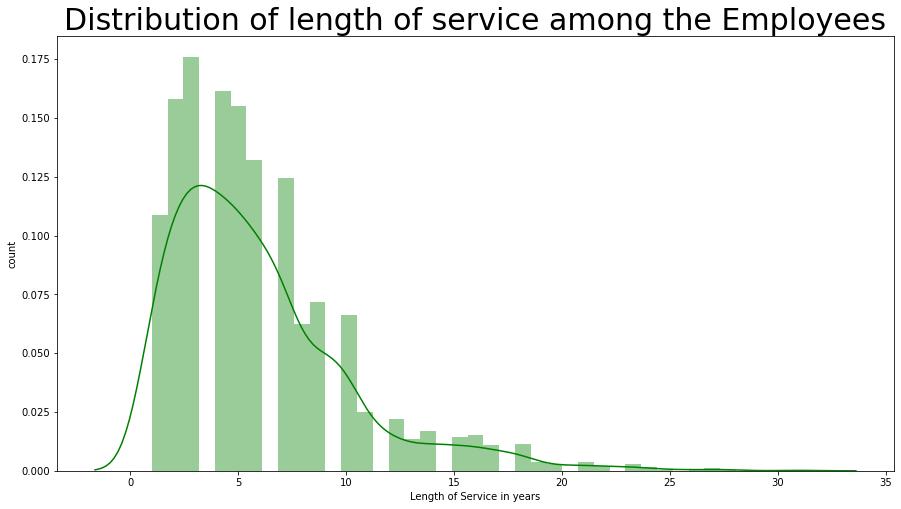

In [29]:
# checking the distribution of length of service
plt.subplots(figsize=(15,8))
sns.distplot(data['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years')
plt.ylabel('count')
plt.show()


In [30]:
data['KPIs_met >80%'].value_counts()

0    1613
1     886
Name: KPIs_met >80%, dtype: int64

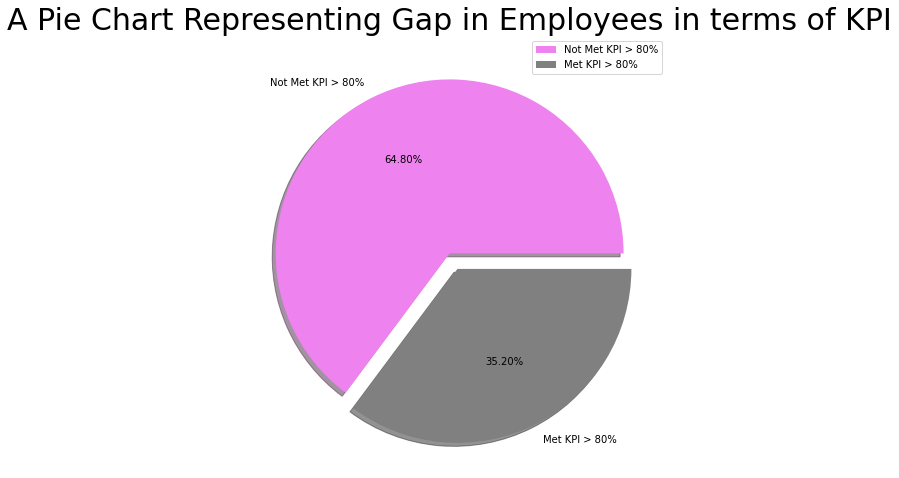

In [31]:
# plotting a pie chart


size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [32]:
data['awards_won?'].value_counts()

0    2436
1      63
Name: awards_won?, dtype: int64

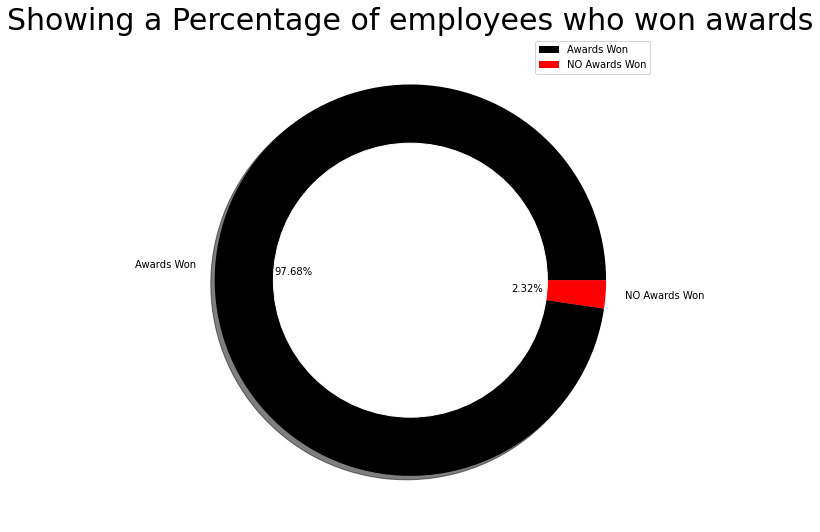

In [33]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [53538, 1270]
colors = ['black', 'red']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


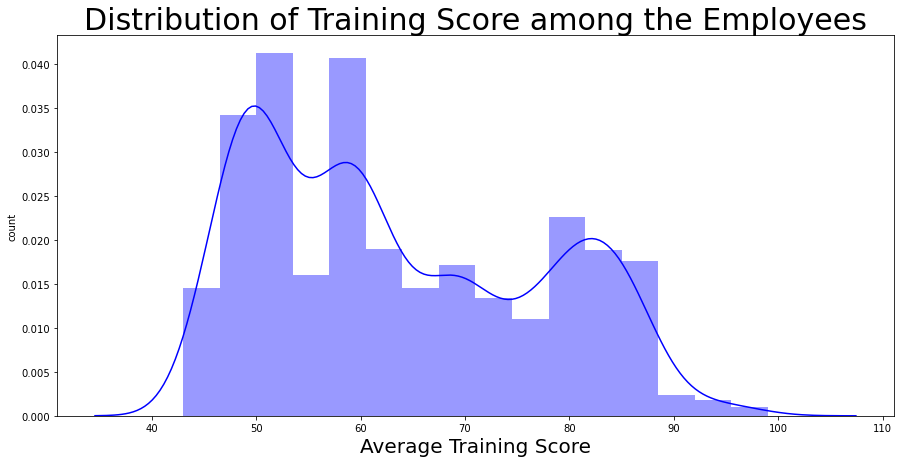

In [34]:
# checking the distribution of the avg_training score of the Employees

plt.subplots(figsize=(15,7))
sns.distplot(data['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [53]:
data['awards_won?'].value_counts()

0    2436
1      63
Name: awards_won?, dtype: int64

In [55]:
# finding the %age of people promoted

awards_won = (63/2499)*100
print("Percentage of awarded Employees is {:.2f}%".format(awards_won))

Percentage of Promoted Employees is 2.52%


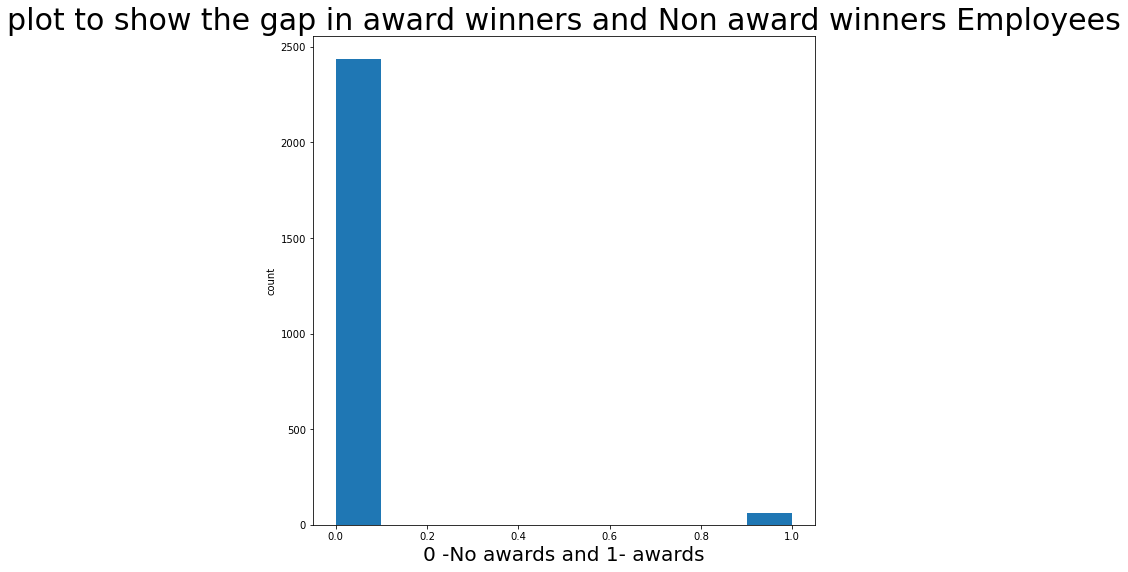

In [56]:
#plotting a scatter plot 

plt.hist(data['awards_won?'])
plt.title('plot to show the gap in award winners and Non award winners Employees', fontsize = 30)
plt.xlabel('0 -No awards and 1- awards', fontsize = 20)
plt.ylabel('count')
plt.show()

In [58]:
#Bivariate
# scatter plot between average training score and is_promoted

data = pd.crosstab(data['avg_training_score'], data['awards_won?'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in winning award', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

KeyError: 'avg_training_score'

In [40]:
# checking dependency of different regions in promotion

data = pd.crosstab(data['region'], data['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

KeyError: 'is_promoted'

In [ ]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# checking dependency on previous years' ratings

data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# checking which department got most number of promotions

data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# checking dependency of gender over promotion

data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()

In [44]:
#Data Pre-processing
# filling missing values

data['education'].fillna(data['education'].mode()[0], inplace = True)
data['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
data.isnull().sum().sum()

0

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

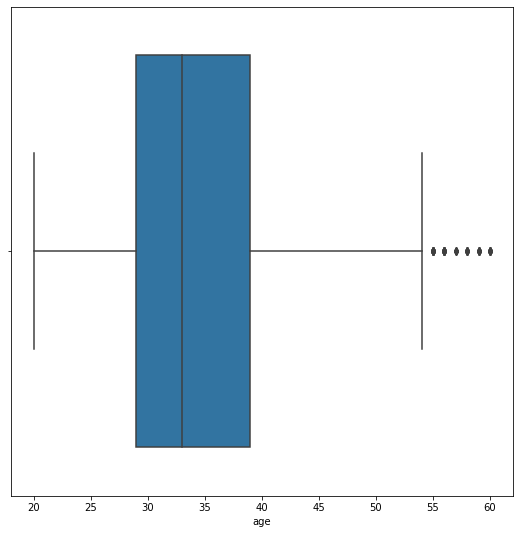

In [45]:
sns.boxplot(data['age'])

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating'>

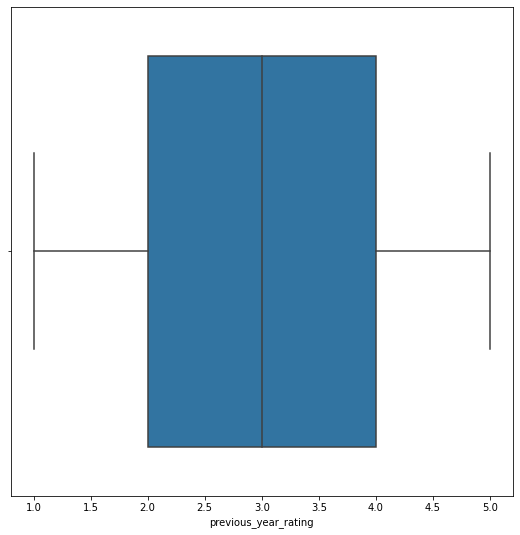

In [46]:
sns.boxplot(data['previous_year_rating'])

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

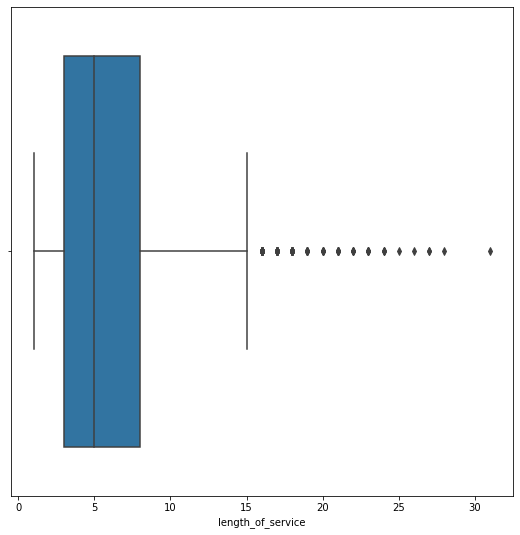

In [47]:
sns.boxplot(data['length_of_service'])

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score'>

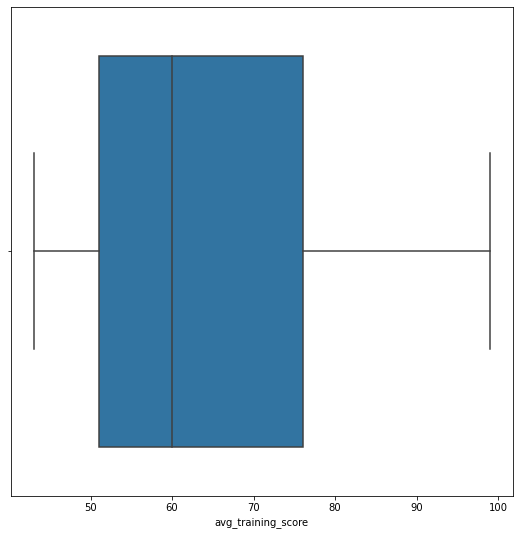

In [49]:
sns.boxplot(data['avg_training_score'])

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_trainings'>

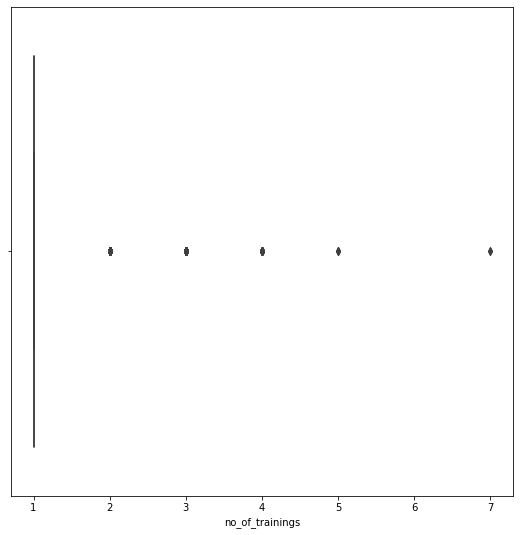

In [50]:
sns.boxplot(data['no_of_trainings'])

In [ ]:
employee_id           2499 non-null   int64  
 1   department            2499 non-null   object 
 2   region                2499 non-null   object 
 3   education             2383 non-null   object 
 4   gender                2499 non-null   object 
 5   recruitment_channel   2499 non-null   object 
 6   no_of_trainings       2499 non-null   int64  
 7   age                   2499 non-null   int64  
 8   previous_year_rating  2312 non-null   float64
 9   length_of_service     2499 non-null   int64  
 10  KPIs_met >80%         2499 non-null   int64  
 11  awards_won?           2499 non-null   int64  
 12  avg_training_score    2499 non-null   int64  
dtypes: float64(1), int6